<a name="top"></a>
# Valoración de datos

## Índice de contenidos
1. [Valoración de datos EEUU](#1)
2. [Valoracion de datos Dataset niñ@s](#2)
3. [Valoración de datos Ópticas](#3)


<a id="1"></a> <br>
### 1. Valoración de datos EEUU

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

In [2]:
eye_dis = pd.read_csv("./Data/Data_main/Prevelance of Eye Diseases in US.csv")
eye_dis["prevalence_rate"] = eye_dis["prevalence_rate"].str.replace('"',"").str.replace(",",".").astype(float)

In [41]:
eye_dis.head()

,state,vision_problem,race,sex,age,number_of_cases,prevalence_rate,population
0,UNITED_STATES,AMD,ALL,ALL,ALL,2069403,0.0209,142648393
1,UNITED_STATES,AMD,ALL,ALL,50-54,79268,0.0036,22298125
2,UNITED_STATES,AMD,ALL,ALL,55-59,81083,0.0041,19664805
3,UNITED_STATES,AMD,ALL,ALL,60-64,95553,0.0057,16817924
4,UNITED_STATES,AMD,ALL,ALL,65-69,113107,0.0091,12435263


In [6]:
eye_dis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52260 entries, 0 to 52259
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   state            52260 non-null  object 
 1   vision_problem   52260 non-null  object 
 2   race             52260 non-null  object 
 3   sex              52260 non-null  object 
 4   age              52260 non-null  object 
 5   number_of_cases  52260 non-null  int64  
 6   prevalence_rate  52260 non-null  float64
 7   population       52260 non-null  int64  
dtypes: float64(1), int64(2), object(5)
memory usage: 3.2+ MB


# Dos dataframes , Uno Solo EEUU y otro de estados

AMD = Age-Related Macular Degeneration

>Quiero tener por separado dos dataframe en los cuales aparezca de manera general(todas las razas, sexos y edades) para poder llevar a cabo la labor de identificación de cual es la enfermedad con mayor predominancia en general y separado por cada estado

In [7]:
cond_1 = eye_dis["age"] == "ALL"
cond_2 = eye_dis["race"] == "ALL"
cond_3 = eye_dis["sex"] == "ALL"
cond_sts = eye_dis["state"] != "UNITED_STATES"
cond_usa = eye_dis["state"] == "UNITED_STATES"

eeuu_only_all = eye_dis[cond_1 & cond_2 & cond_3 & cond_usa]
states_only_all = eye_dis[cond_1 & cond_2 & cond_3 & cond_sts]

In [8]:
EEUU_probl_prv = eeuu_only_all.pivot_table(index='state', columns='vision_problem', values='prevalence_rate')
states_probl_prv = states_only_all.pivot_table(index='state', columns='vision_problem', values='prevalence_rate')

In [9]:
EEUU_probl_prv

vision_problem,AMD,BLINDNESS,CATARACT,DIABETIC_RETINOPATHY,GLAUCOMA,HYPEROPIA,MYOPIA,VISION_IMPAIRMENT
state,,,,,,,,
UNITED_STATES,0.0209,0.009,0.1711,0.0539,0.0191,0.0995,0.2392,0.0204


In [10]:
print("La predominancia de problemas visuales de esta muestra es del",100*EEUU_probl_prv.loc['UNITED_STATES'].sum(),"%")
print("De los cuales la mayor predominancia sobre todas ellas es la miopia con un",100*(EEUU_probl_prv.loc['UNITED_STATES'].max().round(3)),"%")
EEUU_probl_prv["EMMETROPIC"] = 1 - EEUU_probl_prv.loc['UNITED_STATES'].sum()  #Añadimos otra columna a este dataframe para visualizar también la gente que no tiene problemas en esta muestra de gente.

La predominancia de problemas visuales de esta muestra es del 63.31 %
De los cuales la mayor predominancia sobre todas ellas es la miopia con un 23.9 %


>Observamos graficamente como la predominante es la Miopia sobre todas ellas

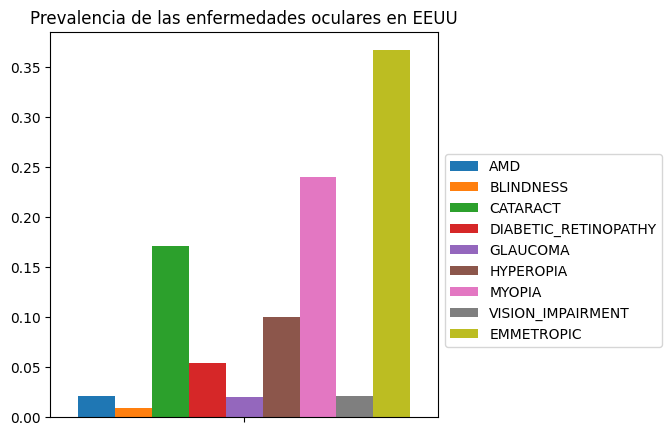

In [11]:
fig, ax = plt.subplots(figsize=(5, 5))
EEUU_probl_prv.plot(kind="bar", ax=ax, width =3)
ax.legend(bbox_to_anchor=(1, 0.7), loc='upper left');
ax.set_xlabel("")
ax.set_xticklabels([])
plt.title("Prevalencia de las enfermedades oculares en EEUU");


En cada estado el diagrama de barras es el siguiente

In [12]:
states_probl_prv["EMMETROPIC"] = 1 - states_probl_prv.sum(axis=1)

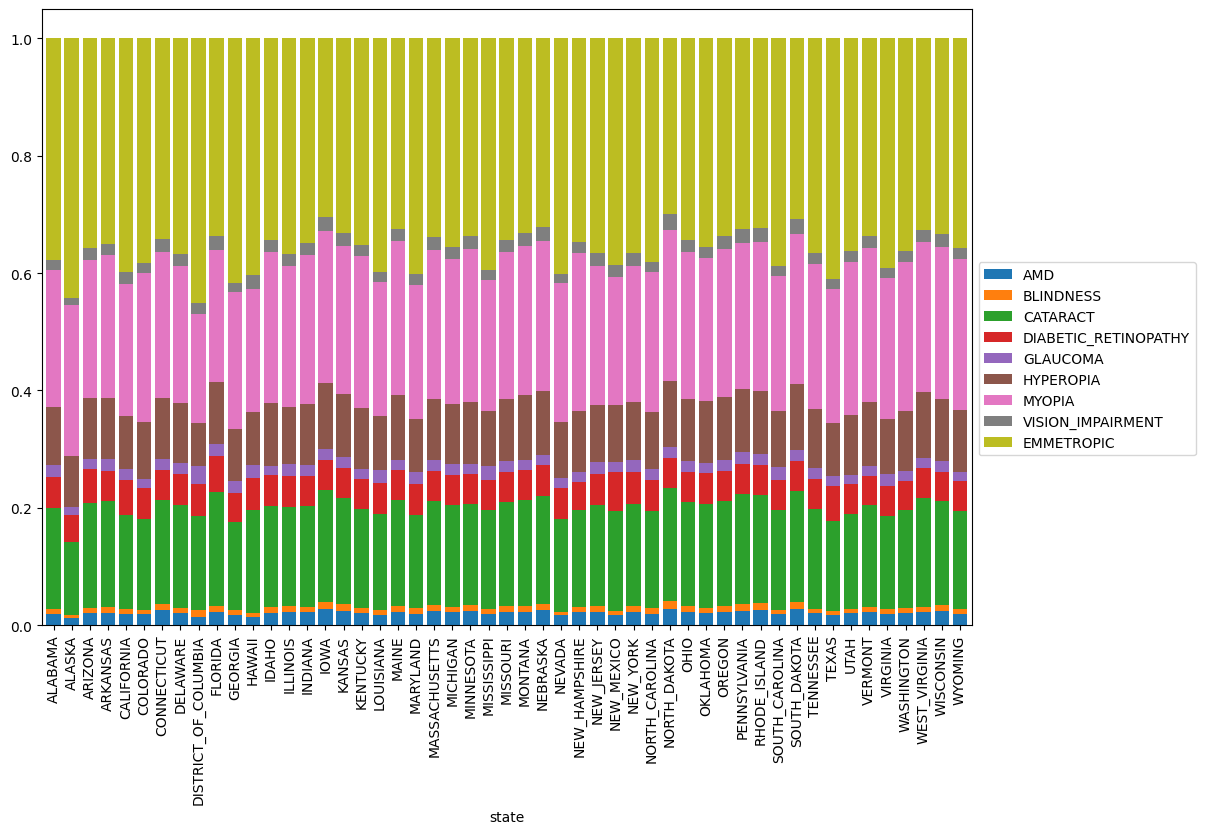

In [16]:
fig, ax = plt.subplots(figsize=(12, 8))
states_probl_prv.plot(kind="bar",stacked=True, ax=ax, width = 0.8)
ax.legend(bbox_to_anchor=(1, 0.6), loc='upper left');



En cuanto al numero de casos en general y por estado es el siguiente

In [29]:
EEUU_probl_cses = eeuu_only_all.pivot_table(index='state', columns='vision_problem', values='number_of_cases')
states_probl_cses = states_only_all.pivot_table(index='state', columns='vision_problem', values='number_of_cases')

In [35]:
EEUU_probl_cses.sum(axis=1)

state
UNITED_STATES    89386061
dtype: int64

El 62,66 % de la muestra de 142648393 tiene algun tipo de problema grave de visión

In [75]:
todo_usa_all.groupby(["state","vision_problem"])["prevalence_rate"].max().sort_values(ascending=False)

state          vision_problem      
UNITED_STATES  MYOPIA                  0.2392
               CATARACT                0.1711
               HYPEROPIA               0.0995
               DIABETIC_RETINOPATHY    0.0539
               AMD                     0.0209
               VISION_IMPAIRMENT       0.0204
               GLAUCOMA                0.0191
               BLINDNESS               0.0090
Name: prevalence_rate, dtype: float64

## Un dataframe por tipo de problema

In [17]:
miopia_gen= eye_dis[eye_dis["vision_problem"] == "MYOPIA"]
hipermetropia_gen = eye_dis[eye_dis["vision_problem"] == "HYPEROPIA"]
amd_gen = eye_dis[eye_dis["vision_problem"] == "AMD"]
blindness_gen = eye_dis[eye_dis["vision_problem"] == "BLINDNESS"]
cataratas_gen = eye_dis[eye_dis["vision_problem"] == "CATARACT"]
retinodiabetica_gen = eye_dis[eye_dis["vision_problem"] == "DIABETIC_RETINOPATHY"]
glaucoma_gen = eye_dis[eye_dis["vision_problem"] == "GLAUCOMA"]
blindness_gen = eye_dis[eye_dis["vision_problem"] == "VISION_IMPAIRMENT"]



## Hacemos diferencias entre estados de cada problema concreto

In [18]:
miopia_p_state = miopia_gen.groupby(["state"])["number_of_cases"]
for i in miopia_p_state:
    print(i)

('ALABAMA', 1740    525188
1741    227291
1742     84911
1743     62715
1744     48051
         ...  
1870     19561
1871     13905
1872     10072
1873      7559
1874      9566
Name: number_of_cases, Length: 135, dtype: int64)
('ALASKA', 2745    77104
2746    36585
2747    14517
2748    10620
2749     6545
        ...  
2875     2919
2876     1618
2877      866
2878      552
2879      668
Name: number_of_cases, Length: 135, dtype: int64)
('ARIZONA', 3750    671647
3751    282641
3752    103180
3753     77844
3754     63279
         ...  
3880     25035
3881     19295
3882     14589
3883     11325
3884     15873
Name: number_of_cases, Length: 135, dtype: int64)
('ARKANSAS', 4755    329724
4756    140485
4757     51758
4758     38786
4759     30375
         ...  
4885     13099
4886      9810
4887      7226
4888      5375
4889      7174
Name: number_of_cases, Length: 135, dtype: int64)
('CALIFORNIA', 5760    3633510
5761    1646996
5762     588090
5763     425691
5764     309060
        

In [42]:
data_eye_problems = eye_dis[eye_dis["vision_problem"] == "MYOPIA"][["number_of_cases","state"]].max

<a id="2"></a> <br>
### Valoracion de datos Dataset niñ@s


In [60]:
myopia_data = pd.read_csv("./Data/Data_main/myopia.csv",sep=";")

In [61]:
myopia_data.info()
myopia_data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 618 entries, 0 to 617
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         618 non-null    int64  
 1   STUDYYEAR  618 non-null    int64  
 2   MYOPIC     618 non-null    int64  
 3   AGE        618 non-null    int64  
 4   GENDER     618 non-null    int64  
 5   SPHEQ      618 non-null    float64
 6   AL         618 non-null    float64
 7   ACD        618 non-null    float64
 8   LT         618 non-null    float64
 9   VCD        618 non-null    float64
 10  SPORTHR    618 non-null    int64  
 11  READHR     618 non-null    int64  
 12  COMPHR     618 non-null    int64  
 13  STUDYHR    618 non-null    int64  
 14  TVHR       618 non-null    int64  
 15  DIOPTERHR  618 non-null    int64  
 16  MOMMY      618 non-null    int64  
 17  DADMY      618 non-null    int64  
dtypes: float64(5), int64(13)
memory usage: 87.0 KB


,ID,STUDYYEAR,MYOPIC,AGE,GENDER,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY
0,1,1992,1,6,1,-0.052,21.89,3.690,3.498,14.70,45,8,0,0,10,34,1,1
1,2,1995,0,6,1,0.608,22.38,3.702,3.392,15.29,4,0,1,1,7,12,1,1
2,3,1991,0,6,1,1.179,22.49,3.462,3.514,15.52,14,0,2,0,10,14,0,0
3,4,1990,1,6,1,0.525,22.20,3.862,3.612,14.73,18,11,0,0,4,37,0,1
4,5,1995,0,5,0,0.697,23.29,3.676,3.454,16.16,14,0,0,0,4,4,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
613,614,1995,1,6,0,0.678,22.40,3.663,3.803,14.93,2,0,7,3,14,37,1,0
614,615,1993,0,6,1,0.665,22.50,3.570,3.378,15.56,6,0,1,0,8,10,1,1
615,616,1995,0,6,0,1.834,22.94,3.624,3.424,15.89,8,0,0,0,4,4,1,1
616,617,1991,0,6,1,0.665,21.92,3.688,3.598,14.64,12,2,1,0,15,23,0,0


Primero cambiamos los valores de 0 y 1 en 

In [115]:
myopia_data["MYOPIC"] = myopia_data['MYOPIC'].replace({0: False, 1: True})
myopia_data["MOMMY"] = myopia_data['MOMMY'].replace({0: False, 1: True})
myopia_data["DADMY"] = myopia_data['DADMY'].replace({0: False, 1: True})
myopia_data["GENDER"] = myopia_data['GENDER'].replace({0: "Male", 1: "Female"})



Primero vamos a intentar probar que el componente genetico tiene importancia en si una persona es miope o no

In [116]:
myopia_data["MYOPIC ONLY DAD"] = (myopia_data["MYOPIC"] == True) & (myopia_data["DADMY"] == True) & (myopia_data["MOMMY"] == False)
myopia_data["MYOPIC ONLY MOM"] = (myopia_data["MYOPIC"] == True) & (myopia_data["MOMMY"] == True) & (myopia_data["DADMY"] == False)
myopia_data["MYOPIC MOM & DAD"] = (myopia_data["MYOPIC"] == True) & (myopia_data["MOMMY"] == True) & (myopia_data["DADMY"] == True)

In [117]:
myopia_data

,ID,STUDYYEAR,MYOPIC,AGE,GENDER,SPHEQ,AL,ACD,LT,VCD,...,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY,MYOPIC ONLY DAD,MYOPIC ONLY MOM,MYOPIC MOM & DAD
0,1,1992,True,6,Female,-0.052,21.89,3.690,3.498,14.70,...,8,0,0,10,34,True,True,False,False,True
1,2,1995,False,6,Female,0.608,22.38,3.702,3.392,15.29,...,0,1,1,7,12,True,True,False,False,False
2,3,1991,False,6,Female,1.179,22.49,3.462,3.514,15.52,...,0,2,0,10,14,False,False,False,False,False
3,4,1990,True,6,Female,0.525,22.20,3.862,3.612,14.73,...,11,0,0,4,37,False,True,True,False,False
4,5,1995,False,5,Male,0.697,23.29,3.676,3.454,16.16,...,0,0,0,4,4,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
613,614,1995,True,6,Male,0.678,22.40,3.663,3.803,14.93,...,0,7,3,14,37,True,False,False,True,False
614,615,1993,False,6,Female,0.665,22.50,3.570,3.378,15.56,...,0,1,0,8,10,True,True,False,False,False
615,616,1995,False,6,Male,1.834,22.94,3.624,3.424,15.89,...,0,0,0,4,4,True,True,False,False,False
616,617,1991,False,6,Female,0.665,21.92,3.688,3.598,14.64,...,2,1,0,15,23,False,False,False,False,False


In [123]:
personas_miope_madre = len(myopia_data[myopia_data['MYOPIC ONLY MOM']])
prob = (personas_miope_madre / len(myopia_data))
prob

0.032362459546925564

In [124]:
personas_miope_padre = len(myopia_data[myopia_data['MYOPIC ONLY DAD']])
prob = personas_miope_padre / len(myopia_data) *100
prob

3.3980582524271843

In [125]:
personas_miope_padre_madre = len(myopia_data[myopia_data['MYOPIC MOM & DAD']])
prob = personas_miope_padre_madre / len(myopia_data) *100
prob

5.6634304207119746

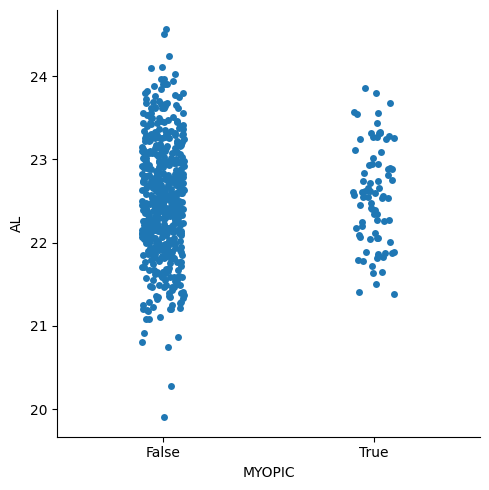

In [126]:
sns.catplot(x="MYOPIC", y="AL", data=myopia_data); 

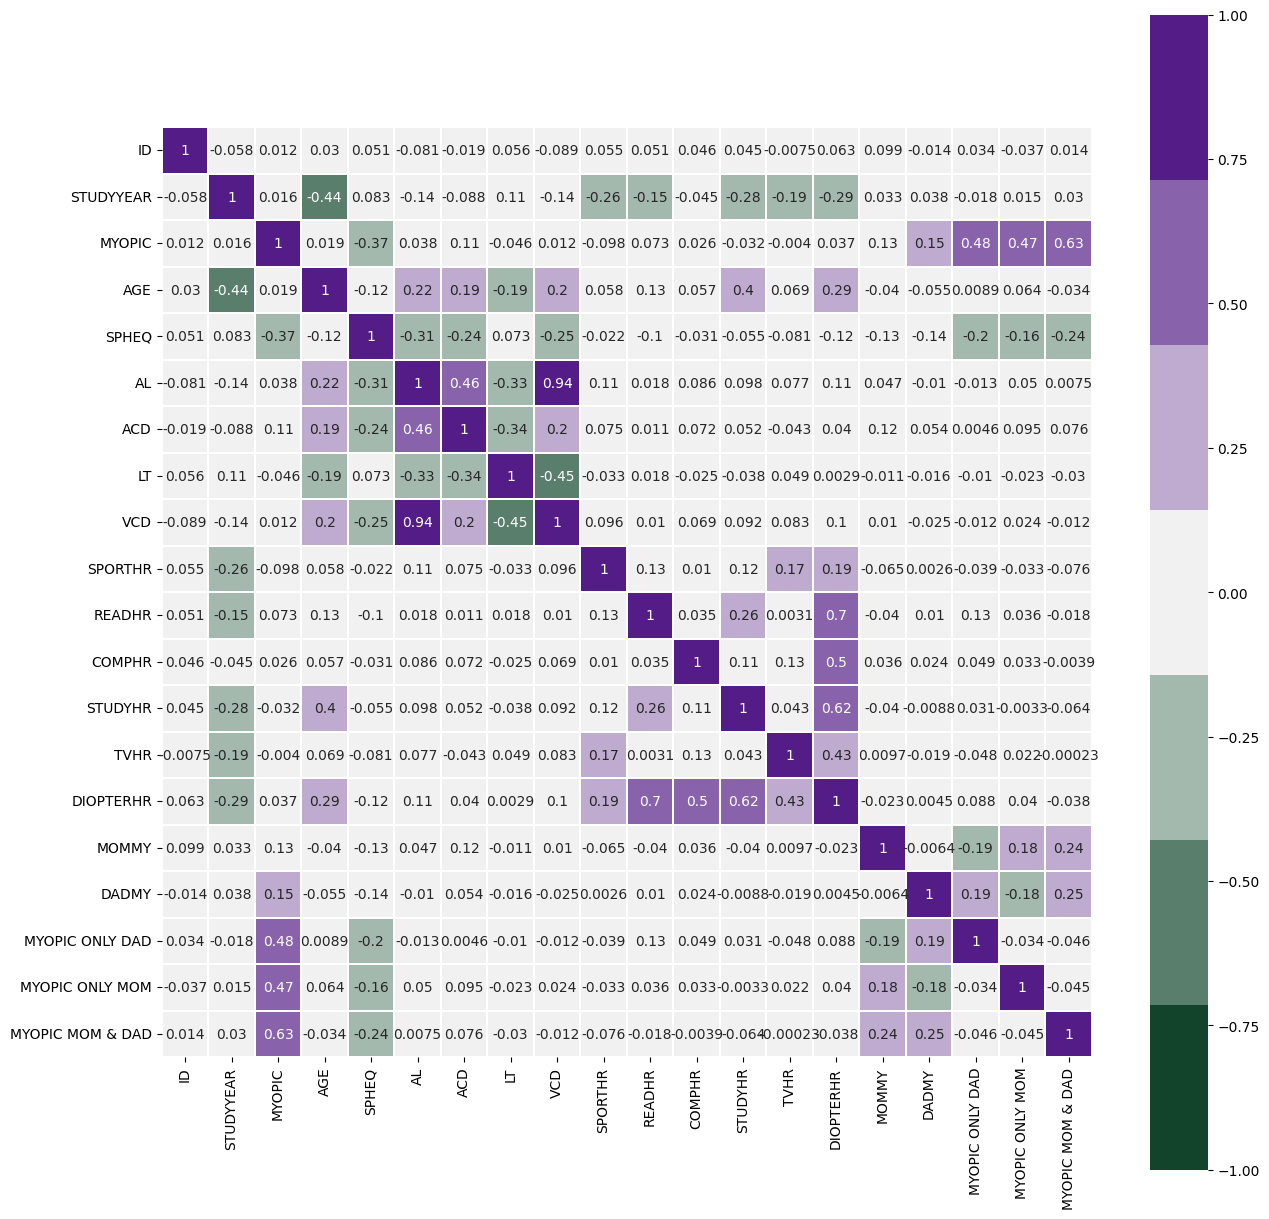

In [127]:
plt.figure(figsize=(15,15))
sns.heatmap(myopia_data.corr(),
            vmin=-1,
            vmax=1,
            cmap=sns.diverging_palette(145, 280, s=85, l=25, n=7),
            square=True,
            linewidths=.1,
            annot=True);

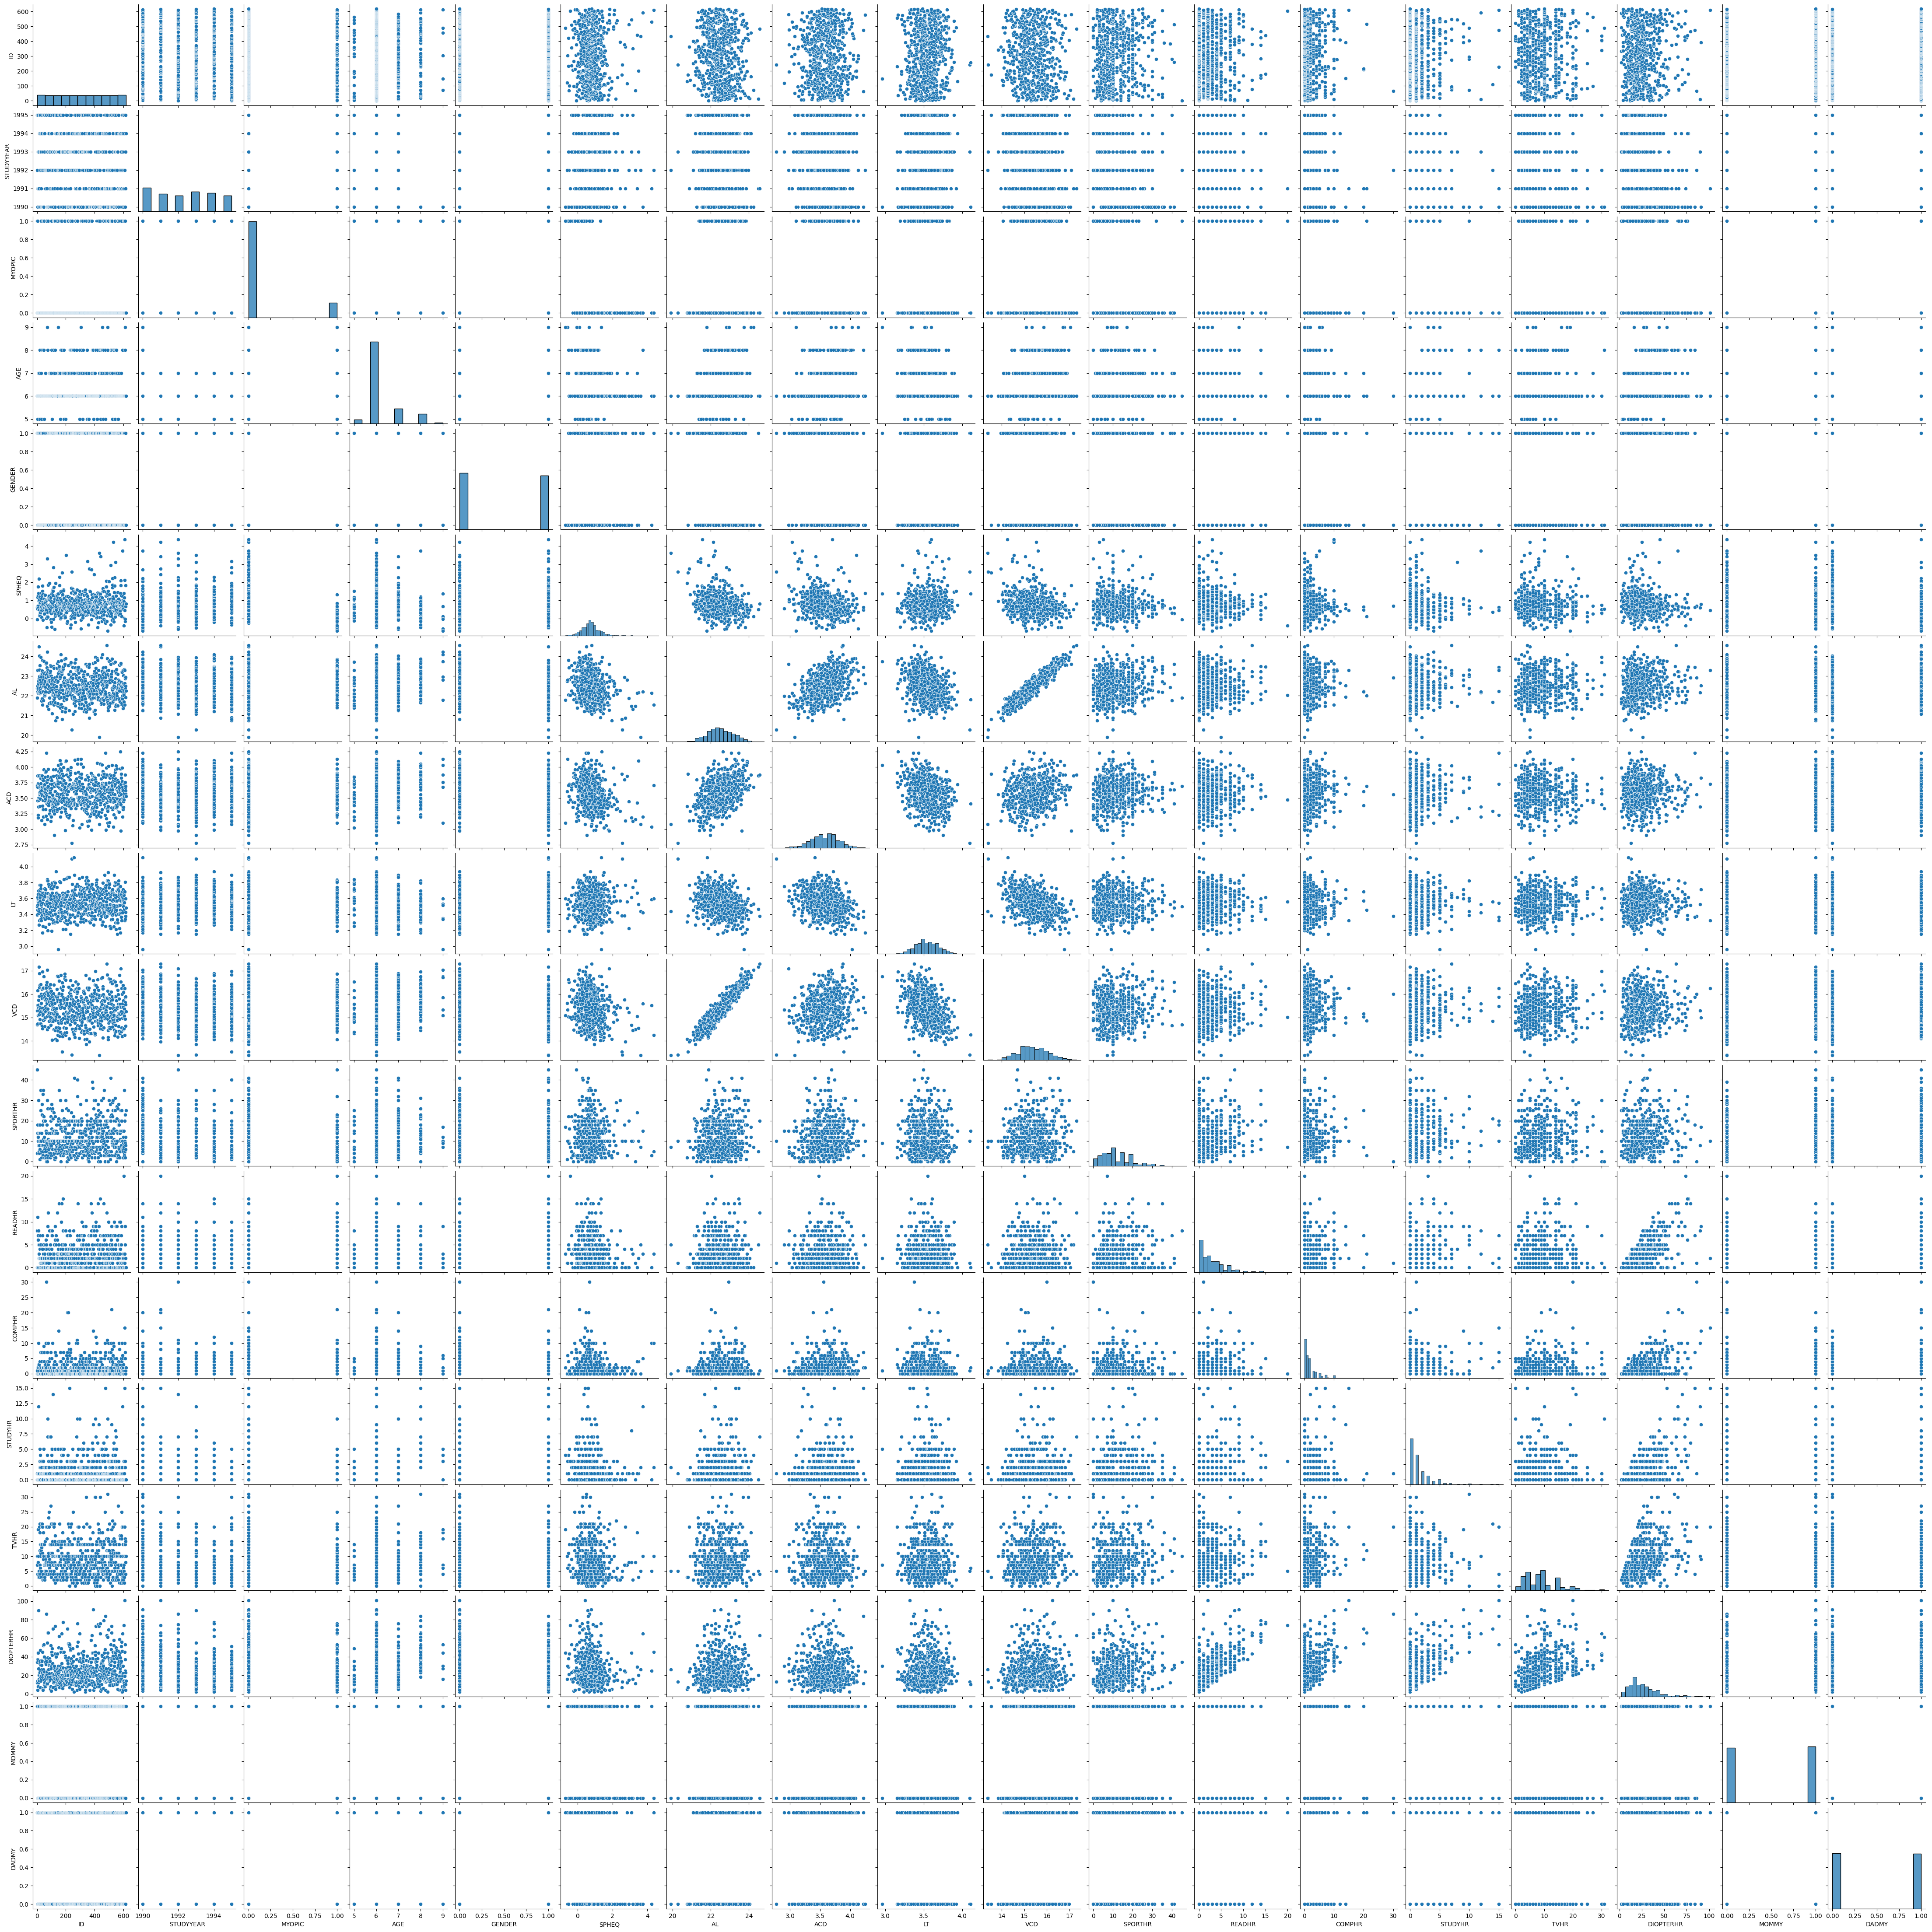

In [6]:
sns.pairplot(myopia_data)

a mayor AL menor potencia  mayor potencial de miope

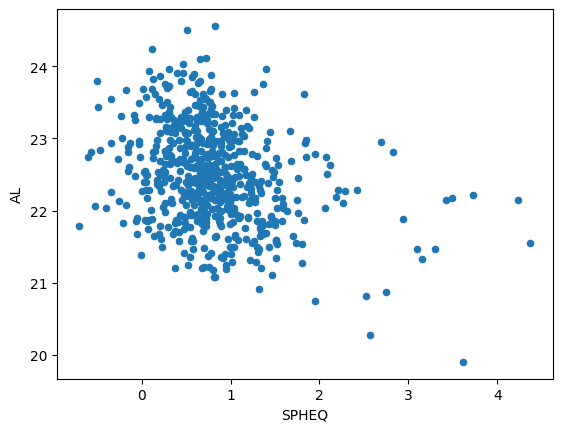

In [96]:
myopia_data.plot("SPHEQ","AL",kind="scatter",legend=False);

In [7]:
np.corrcoef(array_spheq, array_vcd)

array([[ 1.       , -0.2471303],
       [-0.2471303,  1.       ]])

In [8]:
np.corrcoef(array_spheq, array_al)

array([[ 1.        , -0.30551199],
       [-0.30551199,  1.        ]])

In [97]:
myopia_data.groupby("STUDYYEAR")["MYOPIC"].head().count()

30

<a id="3"></a> <br>
### Valoración de datos Ópticas

In [130]:
opt_prod = pd.read_csv("./Data/todo_conc_opticas.csv")

FileNotFoundError: [Errno 2] No such file or directory: './Data/todo_conc_opticas.csv'